# CDS503 - Machine Learning Final Project

Universiti Sains Malaysia


Group 11 - **Wine Quality Prediction Using Classification**

Members:
- JIN WENHUA
- MA RU
- GUO ZIRUI
- CHEN wenxian

## Overview

### Experiment Set 1: Comparing machine learning algorithms  
* JIN WENHUA
### Experiment Set 2: Selecting features
* MA RU
### Experiment Set 3: Ensemble learning
* CHEN WENXIAN 
### Experiment Set 4: Varying training sample size
* GUO ZIRUI


# 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np



In [2]:
df = pd.read_csv('winequality-white.csv', delimiter = ';')
#display the metadata or summary of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Identify each attribute and its type

The data has 4898 rows. There are 11 features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals.

*  fixed_acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
*  volatile_acidity :   Volatile acidity is the gaseous acids present in wine.
* citric_acid :    It is weak organic acid, found in citrus fruits naturally.
* residual_sugar :   Amount of sugar left after fermentation.
* chlorides :   Amount of salt present in wine.
* free_sulfur_dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
* total sulfur dioxide 
* density 
* pH :   In wine pH is used for checking acidity
* sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
* alcohol :   Percent of alcohol present in wine.


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

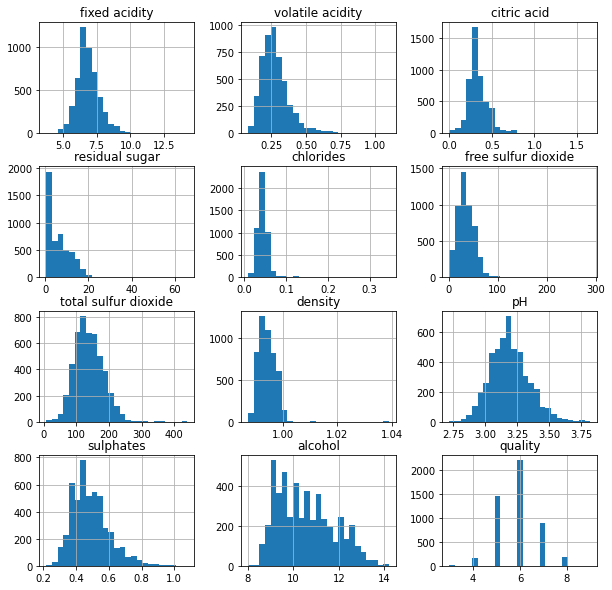

In [19]:
df.hist(bins=25,figsize=(10,10))

<AxesSubplot:>

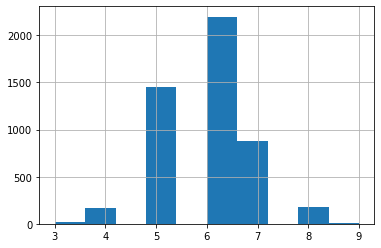

In [20]:
df['quality'].hist()

In [21]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [22]:
cut_bins = [1, 4, 6, 9]
df['quality'] = pd.cut(df['quality'], bins = cut_bins, labels = [0, 1, 2])
df['quality'].value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

In [23]:
#save the preprocess data
df.to_csv(r'winequality-preprocess.csv', index = False, header = True)

# Experiment Set 1: Comparing Machine Learning Algorithms

In this experiment set, we compare the baseline performance and the best performance (after parameter tuning) on the test set for each machine learning algorithm being used.

The list of machine learning algorithms are:

- K-Nearest Neighbors
- Decision Tree
- SVM

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
#import function for k-fold cross validation 
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
#import decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

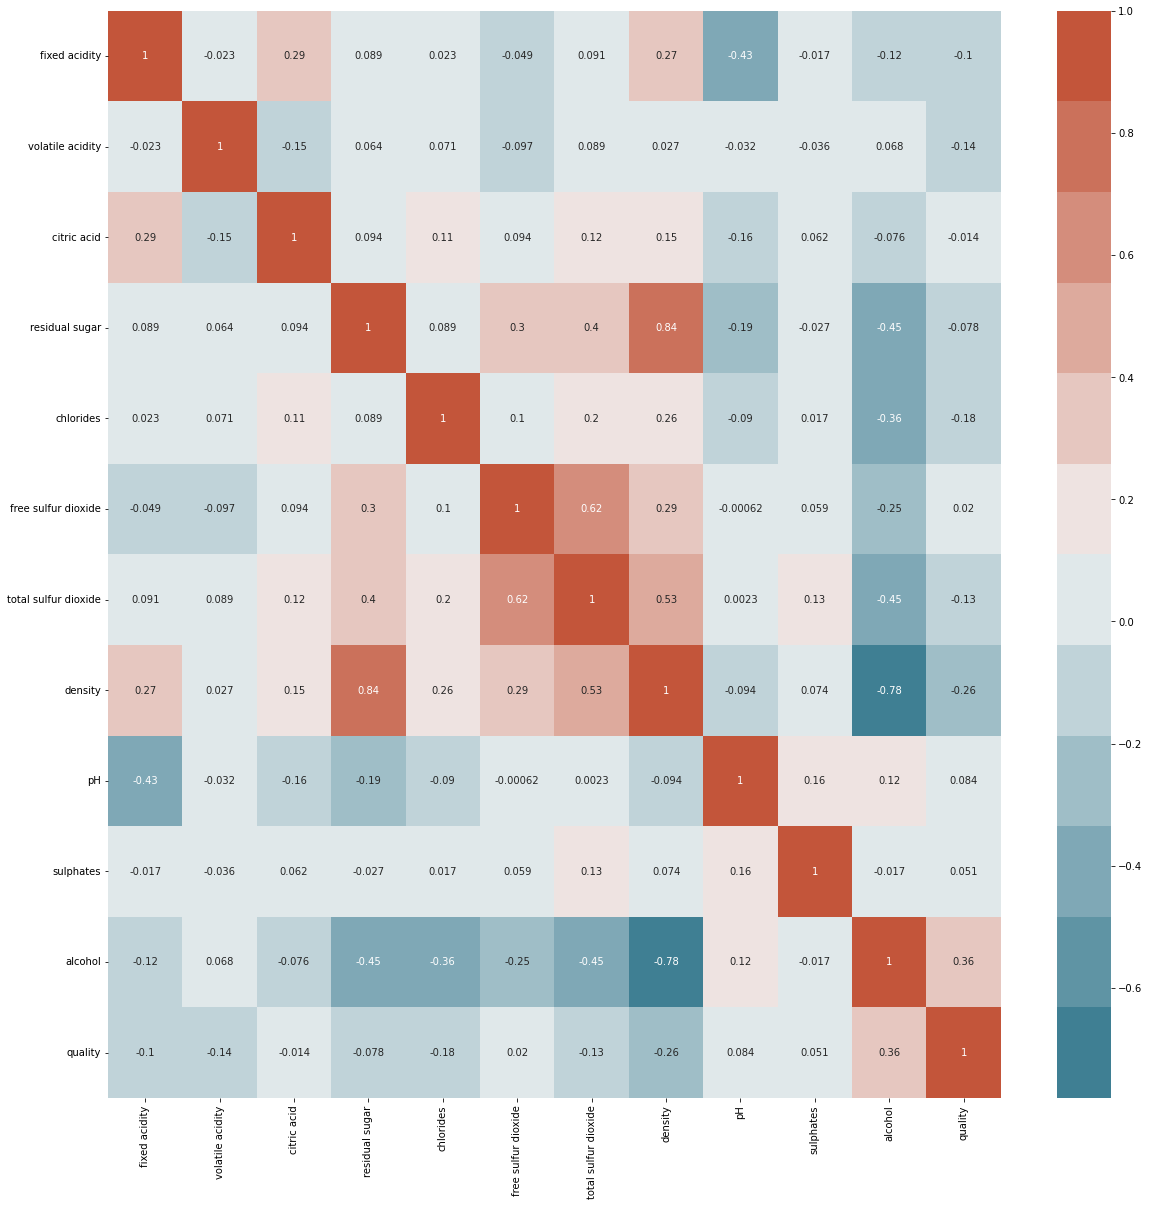

In [4]:
df = pd.read_csv('winequality-preprocess.csv')
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220,20,n=12), annot = True)
plt.show()

In [13]:
#Indicate the target column
target = df['quality']

#Indicatethe columns that will serve as features.
features = df.drop('quality', axis = 1)

scaler = StandardScaler()
features = scaler.fit_transform(features)

In [16]:

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [7]:
def best_parameter(param_grid, estimator):
    #fit on the dataset on all parameter combinations in param_grid 
    #retain the best conbination 
    #because our data is unbalanced data, we use f1_weighted
    grid_search = GridSearchCV(estimator, param_grid, cv = 5, scoring = 'f1_weighted')
    #Train model while tuning the parameters using grid search 
    grid_result = grid_search.fit(x_train, y_train)
    #display the best parameter c value 
    print(grid_result.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    return grid_search

In [43]:
def validation(estimator):
    #train model 
    estimator.fit(x_train, y_train)

    #predict the target for the test dataset 
    test_predict = estimator.predict(x_test)

    print(estimator.__class__)

    scores = cross_val_score(estimator, x_train, y_train, cv =5, scoring = 'f1_weighted')
    print("f1_weighted(validation) = ", scores.mean())
    
    #compute the model accuracy on the development set: How often is the classifier correct?
    print("f1_weighted(test):{}".format(metrics.f1_score(y_test, test_predict, average='weighted')))

    #print confusion matrix
    print(confusion_matrix(y_test, test_predict))

    #print precision, recall and f1 
    print(classification_report(y_test, test_predict))

## 1.1 K-Nearest Neighbors

In [50]:
validation(KNeighborsClassifier())

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.7648175925503283
f1_weighted(test):0.7945188655919486
[[  6  23   1]
 [  8 661  54]
 [  0 104 123]]
              precision    recall  f1-score   support

           0       0.43      0.20      0.27        30
           1       0.84      0.91      0.87       723
           2       0.69      0.54      0.61       227

    accuracy                           0.81       980
   macro avg       0.65      0.55      0.59       980
weighted avg       0.79      0.81      0.79       980



In [41]:
#the param_grid specifies one grid should be explored 
param_grid = {"n_neighbors":[1,3, 5,7, 9, 11], "weights" : ['uniform', 'distance'], 
              "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p":[1,2,3]}

best_parameter(param_grid, KNeighborsClassifier())

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
0.8112841274300744
KNeighborsClassifier(n_neighbors=9, weights='distance')


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [45]:
validation(KNeighborsClassifier(n_neighbors=9, weights='distance'))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8112841274300744
f1_weighted(test):0.8417048078076167
[[  6  22   2]
 [  2 676  45]
 [  0  75 152]]
              precision    recall  f1-score   support

           0       0.75      0.20      0.32        30
           1       0.87      0.93      0.90       723
           2       0.76      0.67      0.71       227

    accuracy                           0.85       980
   macro avg       0.80      0.60      0.64       980
weighted avg       0.85      0.85      0.84       980



## 1.2 Decision Tree

In [46]:
validation(DecisionTreeClassifier())

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7696428770526091
f1_weighted(test):0.7850757623994209
[[ 11  17   2]
 [ 26 592 105]
 [  2  65 160]]
              precision    recall  f1-score   support

           0       0.28      0.37      0.32        30
           1       0.88      0.82      0.85       723
           2       0.60      0.70      0.65       227

    accuracy                           0.78       980
   macro avg       0.59      0.63      0.60       980
weighted avg       0.80      0.78      0.79       980



In [56]:
#the param_grid specifies one grid should be explored 
param_grid = {"criterion":["gini", "entropy"], 
              "splitter" : ["best", "random"], 
              "max_depth":[7, 8, 9, 10, 11, 12, 13, 14, None]}

best_parameter(param_grid, DecisionTreeClassifier())

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
0.7745566377576688
DecisionTreeClassifier(criterion='entropy')


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, None],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [47]:
validation(DecisionTreeClassifier(criterion='entropy'))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7748538331524093
f1_weighted(test):0.7986239646938167
[[ 13  13   4]
 [ 22 610  91]
 [  0  71 156]]
              precision    recall  f1-score   support

           0       0.37      0.43      0.40        30
           1       0.88      0.84      0.86       723
           2       0.62      0.69      0.65       227

    accuracy                           0.79       980
   macro avg       0.62      0.65      0.64       980
weighted avg       0.80      0.79      0.80       980



## 1.3 SVM

In [48]:
validation(SVC())

<class 'sklearn.svm._classes.SVC'>
f1_weighted(validation) =  0.7463428599607058
f1_weighted(test):0.757039783775711
[[  1  29   0]
 [  0 698  25]
 [  0 148  79]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.80      0.97      0.87       723
           2       0.76      0.35      0.48       227

    accuracy                           0.79       980
   macro avg       0.85      0.45      0.47       980
weighted avg       0.80      0.79      0.76       980



In [14]:
#the param_grid specifies one grid should be explored 
param_grid = {"C":[1, 10, 100, 1000]}

#fit on the dataset on all parameter combinations in param_grid 
#retain the best conbination 
best_parameter(param_grid, SVC(kernel = 'linear'))

{'C': 100}
0.7570448721915268
SVC(C=100, kernel='linear')


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10, 100, 1000]}, scoring='f1_weighted')

In [19]:
param_grid = {"C":[1, 10, 100, 1000], 'degree':[1,2,3,4,5]}
best_parameter(param_grid, SVC(kernel = 'poly'))

{'C': 1000, 'degree': 1}
0.7570448721915268
SVC(C=1000, degree=1, kernel='poly')


GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 10, 100, 1000], 'degree': [1, 2, 3, 4, 5]},
             scoring='f1_weighted')

In [20]:
param_grid = {"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto']}
best_parameter(param_grid, SVC(kernel = 'rbf'))

{'C': 1, 'gamma': 'auto'}
0.7573374916624601
SVC(C=1, gamma='auto')


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 'scale', 'auto']},
             scoring='f1_weighted')

In [21]:
param_grid = {"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto'], 
               "coef0":[0,1,10]}
best_parameter(param_grid, SVC(kernel = 'sigmoid'))

{'C': 10, 'coef0': 0, 'gamma': 'scale'}
0.7312322213101939
SVC(C=10, coef0=0, kernel='sigmoid')


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [1, 10, 100, 1000], 'coef0': [0, 1, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 'scale', 'auto']},
             scoring='f1_weighted')

In [49]:
validation(SVC(C=1, gamma='auto'))

<class 'sklearn.svm._classes.SVC'>
f1_weighted(validation) =  0.7465363480450318
f1_weighted(test):0.757039783775711
[[  1  29   0]
 [  0 698  25]
 [  0 148  79]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.80      0.97      0.87       723
           2       0.76      0.35      0.48       227

    accuracy                           0.79       980
   macro avg       0.85      0.45      0.47       980
weighted avg       0.80      0.79      0.76       980



# Experiment Set 1: conclusion

obviously KNN is the best performing model, which has the highest weighted f1-score 0.84
